<a href="https://colab.research.google.com/github/Ankan1998/Hackathons/blob/main/HackerEarth_Carnival_Wars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Checking the dataset

In [1]:
import pandas as pd 
import numpy as np

In [2]:
train=pd.read_csv("/content/drive/MyDrive/Hackathon/HackerEarth Machine Learning Challenge: Carnival Wars/dataset/train.csv")
test=pd.read_csv("/content/drive/MyDrive/Hackathon/HackerEarth Machine Learning Challenge: Carnival Wars/dataset/test.csv")
sample=pd.read_csv("/content/drive/MyDrive/Hackathon/HackerEarth Machine Learning Challenge: Carnival Wars/dataset/sample_submission.csv")

In [3]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [ ]:
len(train)

6368

In [ ]:
test.head()

In [ ]:
sample.head()

### Inspecting Train Set

In [4]:
# drop product id
train.drop(labels="Product_id",axis=1,inplace=True)

In [5]:
# Nan Plot
def nan_plotter(dataset):
  import matplotlib.pyplot as plt
  nan_list=dict()
  for i in dataset:
    nan_list[i]=dataset[i].isnull().sum()
  plt.figure(figsize=(15,5))
  # creating the bar plot 
  plt.bar(list(nan_list.keys()), list(nan_list.values()), color ='lightblue',  
          width = 0.3) 
  plt.xticks(rotation=90)
  


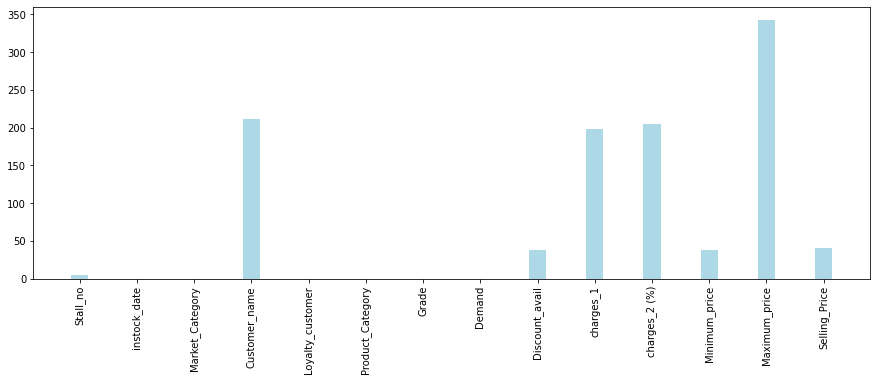

In [ ]:
nan_plotter(train)

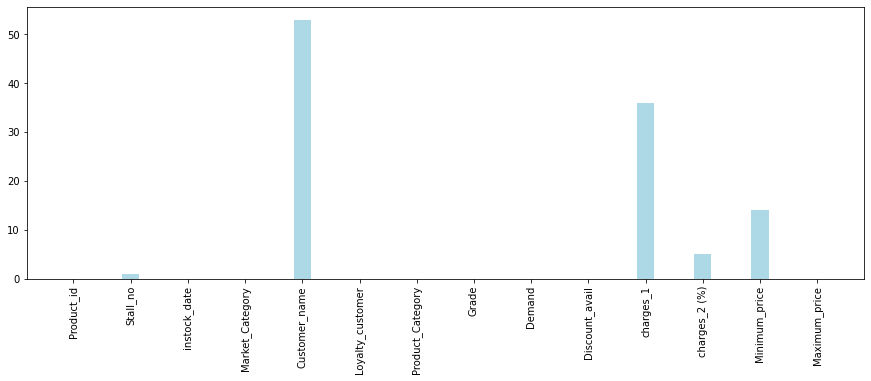

In [ ]:
nan_plotter(test)

In [6]:
# Drop rows where Selling_price is nan
train.dropna(axis=0,subset=["Selling_Price"],inplace=True)

In [7]:
# As the Discount_avail, Minimum_price, Stall_no is very low nan
train.dropna(axis=0,subset=["Discount_avail","Minimum_price","Stall_no"],inplace=True)

In [ ]:
# Counting unique in customer name
len(train["Customer_name"].unique())

5799

In [8]:
# Dropping Customer_name
train.drop(labels="Customer_name",axis=1,inplace=True)

In [10]:
train_xp=train.copy()

In [11]:
# Finding presence of outlier
train_xp.dropna(axis=0,subset=["Maximum_price"],inplace=True)
train_xp.dropna(axis=0,subset=["charges_1"],inplace=True)
train_xp.dropna(axis=0,subset=["charges_2 (%)"],inplace=True)

In [12]:
import numpy as np
import pandas as pd

def detect_outlier(data_1):
    outliers={}
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for idx,y in enumerate(data_1):
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers[idx]=y
    return outliers



In [13]:
out_max=detect_outlier(list(train_xp["Maximum_price"]))
out_ch1=detect_outlier(list(train_xp["charges_1"]))
out_min=detect_outlier(list(train_xp["Minimum_price"]))
out_sel_p=detect_outlier(list(train_xp["Selling_Price"]))

In [ ]:
detect_outlier(list(train_xp["charges_2 (%)"]))

{}

In [17]:
# Data with same indexed outlier
common=[]
for i in list(out_ch1.keys()):
  if i in list(out_max.keys()):
    common.append(i)
  else:
    continue


In [18]:
# getting index of oulier
list_outlier=sorted(list(set(list(out_max.keys())+list(out_min.keys())+list(out_sel_p.keys()) + list(out_max.keys()))))

In [19]:
len(list_outlier)

121

In [20]:
# dropping outlier row
train_xp.drop(train_xp.index[list_outlier],inplace=True)

In [22]:
# Filling up nan
# maximum_price has outlier, charges_1 has outlier 
#charges_2 (%) has no outlier 
train_xp['charges_2 (%)']=train_xp['charges_2 (%)'].fillna(train_xp['charges_2 (%)'].mean()).astype(int)
train_xp['charges_1']=train_xp['charges_1'].fillna(train_xp['charges_1'].median()).astype(int)
train_xp['Maximum_price']=train_xp['Maximum_price'].fillna(train_xp['Maximum_price'].median()).astype(int)

In [ ]:
# Unique counter
def unique_counter(dataset):
  uni=[]
  for i in dataset:
    uni.append((i,len(dataset[i].unique())))
  return uni

In [ ]:
unique_counter(train_xp)

[('Stall_no', 50),
 ('instock_date', 4714),
 ('Market_Category', 237),
 ('Loyalty_customer', 2),
 ('Product_Category', 10),
 ('Grade', 4),
 ('Demand', 100),
 ('Discount_avail', 2),
 ('charges_1', 480),
 ('charges_2 (%)', 17),
 ('Minimum_price', 3804),
 ('Maximum_price', 4231),
 ('Selling_Price', 5446)]

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_xp['Loyalty_customer']=le.fit_transform(train_xp['Loyalty_customer'])

In [24]:
product=train_xp[['Product_Category']]
product=pd.get_dummies(product,drop_first=True)
train_xp=pd.concat([train_xp,product],axis=1)
train_xp.drop(['Product_Category'],axis=1,inplace=True)

In [27]:
y=train_xp["Selling_Price"]

In [29]:
train_xp.drop(['instock_date'],axis=1,inplace=True)
train_xp.drop(['Selling_Price'],axis=1,inplace=True)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_xp,y,test_size=0.1,random_state=10)

### Base Model with Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth = 15, random_state=0,n_estimators = 100,verbose = 1)
reg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=1, warm_start=False)

In [ ]:
reg.score(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.9990429004311564

In [ ]:
y_pred=reg.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
from sklearn.metrics import r2_score
rsquare=r2_score(y_test,y_pred)

In [ ]:
rsquare

0.9860244048525305

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
 
rmse = np.sqrt(MSE(y_test,y_pred)) 
print("RMSE : % f" %(rmse)) 

RMSE :  322.275388


In [ ]:
import pickle
Pkl_Filename = "/content/drive/MyDrive/Hackathon/HackerEarth Machine Learning Challenge: Carnival Wars/Pickle_rfreg_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(reg, file)

In [ ]:
# Load the Model back from file
Pkl_Filename = "/content/drive/MyDrive/Hackathon/HackerEarth Machine Learning Challenge: Carnival Wars/Pickle_rfreg_Model.pkl"  
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)



## Advanced modelling

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
from sklearn.ensemble import RandomForestRegressor
reg_rand=RandomForestRegressor()

In [37]:
parameters={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 600, 1000, 1400, 1800]}
random_search=RandomizedSearchCV(estimator= reg_rand,
                        param_distributions=parameters,
                        scoring = 'neg_mean_absolute_error',
                        cv = 10,
                        n_iter=25,
                        n_jobs= 4,
                        verbose=5,
                        return_train_score=True,
                        random_state=42)
best_acc=random_search.fit(train_xp,y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.9min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 13.9min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 50.3min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 65.8min finished


In [38]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
regressor_mod=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
regressor_mod.fit(train_xp,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
import pickle
Pkl_Filename = "/content/drive/MyDrive/Hackathon/HackerEarth Machine Learning Challenge: Carnival Wars/Pickle_rftuned_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor_mod, file)

### **Test Data**

In [43]:
test['Stall_no']=test['Stall_no'].fillna(test['Stall_no'].median())
test['charges_1']=test['charges_1'].fillna(test['charges_1'].median())
test['charges_2 (%)']=test['charges_2 (%)'].fillna(test['charges_2 (%)'].median())
test['Minimum_price']=test['Minimum_price'].fillna(test['Minimum_price'].median())

In [44]:
product_test=test[['Product_Category']]
product_test=pd.get_dummies(product_test,drop_first=True)
test=pd.concat([test,product_test],axis=1)
test.drop(['Product_Category'],axis=1,inplace=True)

In [47]:
test1=test.copy()

In [48]:
test1.drop(['Customer_name',"instock_date","Product_id"],axis=1,inplace=True)

In [49]:
le=LabelEncoder()
test1['Loyalty_customer']=le.fit_transform(test1['Loyalty_customer'])

In [51]:
predictions=regressor_mod.predict(test1)

In [52]:
data=pd.read_csv('/content/drive/MyDrive/Hackathon/HackerEarth Machine Learning Challenge: Carnival Wars/dataset/test.csv')
predictions_test=data['Product_id']

In [53]:
final_df = pd.DataFrame()
final_df["Product_id"] = predictions_test
final_df["Selling_Price"] = predictions
final_df.Selling_Price = np.where(final_df.Selling_Price < 0, 0,final_df.Selling_Price)
final_df.to_csv("/content/drive/MyDrive/Hackathon/HackerEarth Machine Learning Challenge: Carnival Wars/Output_rftuned.csv")
final_df.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3263.651993
1,ACCEGCATKHNRXUHW,1942.075930
2,NKCE6GJ5XVJDXNNZ,11381.876478
3,NKCEB8BK3ZXDHDHM,9515.101472
4,TOPEFDXSAHRNPF94,5531.999675
